The goal of this notebook is to take our dataset and create a zip containing the images and a csv file containing the labels in relation to the images. The labels are 4 numbers for bounding boxes.

The zip is then to be sent to google drive from where we will be able to use it inside our google colab notebook.

In [9]:
from os import path, walk
from matplotlib import pyplot as plt
from matplotlib import patches
import random as rd
from tqdm import tqdm
import pandas as pd

%run '../alprLib/PlateBoundingBox.py'

In [10]:
DATASET_PATH = "../eu_dataset/train"
ANNOTATIONS_PATH = path.join(DATASET_PATH, "annots")
IMAGES_PATH = path.join(DATASET_PATH, "images")

Image shape: (720, 1280, 4)


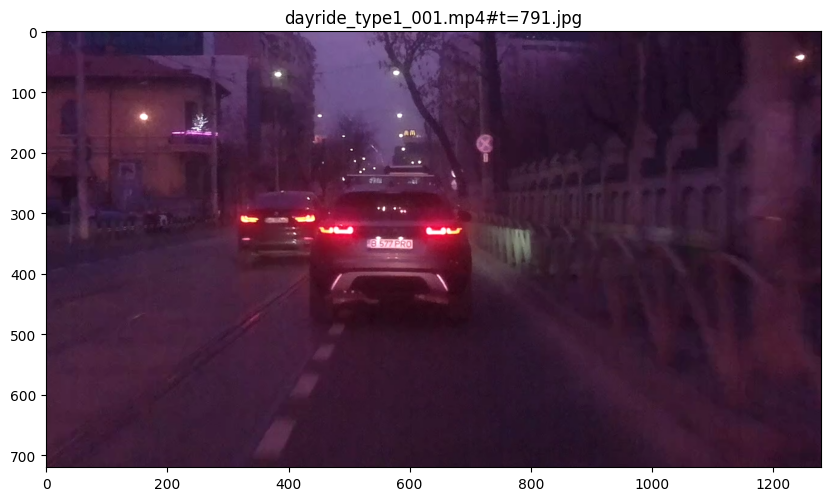

In [11]:
image_filenames = list(walk(IMAGES_PATH))
image_filename = rd.choice(image_filenames[0][2])
image_path = path.join(image_filenames[0][0], image_filename)
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
print('Image shape: {}'.format(img.shape))

In [12]:
annotation = image_filename.replace(".jpg", ".xml")
annotation_path = path.join(ANNOTATIONS_PATH, annotation)
print('Annotation path: {}'.format(annotation_path))

with open(annotation_path, 'r') as f:
    print(f.read())

Annotation path: ../eu_dataset/train/annots/dayride_type1_001.mp4#t=791.xml
<annotation verified="yes">
    <folder>Annotation</folder>
    <filename>dayride_type1_001.mp4#t=791.jpg</filename>
    <path>license-plate-detector-PascalVOC-export/Annotations/dayride_type1_001.mp4#t=791.jpg</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>1280</width>
        <height>720</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
    <name>license-plate</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
        <xmin>525.1786400307337</xmin>
        <ymin>339.8360655737705</ymin>
        <xmax>609.7579715712639</xmax>
        <ymax>362.95081967213116</ymax>
    </bndbox>
</object>
</annotation>



In [13]:
plate = PlateBoundingBox(xml_path=annotation_path)
plate.describe()

PlateBoundingBox
xml_path: ../eu_dataset/train/annots/dayride_type1_001.mp4#t=791.xml
image_name: dayride_type1_001.mp4#t=791.jpg
image_width: 1280
image_height: 720
xmin: 525
ymin: 339
xmax: 609
ymax: 362
width: 84
height: 23
center: (567.0, 350.5)
area: 1932



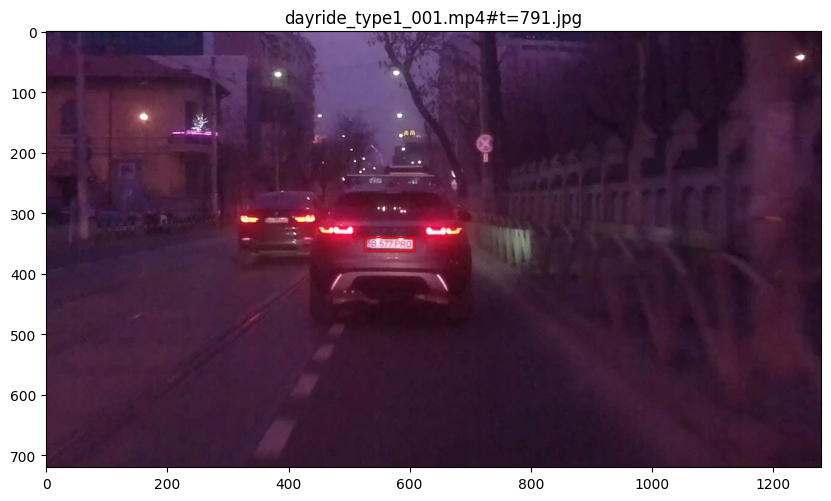

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
rect = patches.Rectangle((plate.xmin, plate.ymin), plate.width, plate.height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [15]:
# create a dataframe that holds the bounding box information for each image
df = pd.DataFrame(columns=['filename', 'w', 'h', 'xc', 'yc'])
for filename in tqdm(image_filenames[0][2]):
    annotation = filename.replace(".jpg", ".xml")
    annotation_path = path.join(ANNOTATIONS_PATH, annotation)
    plate = PlateBoundingBox(xml_path=annotation_path)
    new_row = pd.DataFrame({
        'filename': filename, 
        'w': plate.width01,
        'h': plate.height01,
        'xc': plate.center01[0],
        'yc': plate.center01[1],
    }, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)

df.head()

100%|██████████| 427/427 [00:00<00:00, 2237.98it/s]


,filename,w,h,xc,yc
0,nightride_type3_001.mp4#t=557.jpg,0.117188,0.063889,0.525000,0.526389
1,dayride_type1_001.mp4#t=1090.jpg,0.078906,0.038889,0.470703,0.554167
2,nightride_type3_001.mp4#t=6.jpg,0.190625,0.101389,0.635938,0.657639
3,dayride_type1_002.mp4#t=793.jpg,0.131250,0.056944,0.549219,0.889583
4,dayride_type1_001.mp4#t=450.jpg,0.067187,0.033333,0.186719,0.538889


In [17]:
# zip ./archive/images with the dataframe exported as csv

# export the dataframe as csv
df.to_csv('labels.csv', index=False)

# zip the images and the csv file (make sure all files are copied to the root of the zip file)
!zip -j dataset.zip ./eu_dataset/images_resized/* labels.csv

# remove the csv file
!rm labels.csv

zsh:1: no matches found: ./eu_dataset/images_resized/*
